# Variational Quantum Classifier


In this notebook, we are going to train Aqua's Variational Quantum Classifier to classify instances of a dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library.n_local.two_local import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA

We choose the feature map and the variational form

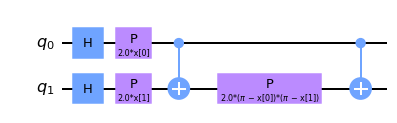

In [2]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear')
feature_map.draw(output="mpl")

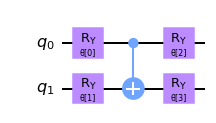

In [3]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 1)
var_form.draw(output="mpl")

We create the training dataset

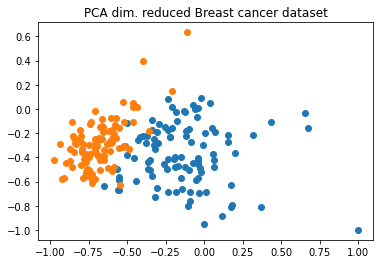

In [4]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=100,
    test_size=10,
    n=2,
    plot_data=True
)

After we have generated the training data and defined the feature map and variational form, we can now train the VQC. 

In [5]:
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
optimizer = COBYLA()
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

{'num_optimizer_evals': 80, 'min_val': 0.5233992585745264, 'opt_params': array([-1.90745296, -0.3521523 ,  0.62430545, -2.26211116]), 'eval_time': 120.09094429016113, 'eval_count': 80, 'training_loss': 0.5233992585745264, 'testing_accuracy': 0.8, 'test_success_ratio': 0.8, 'testing_loss': 0.5527165683891208}


We now select more complicated feature maps and variational forms

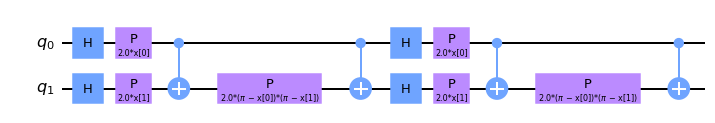

In [6]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
feature_map.draw(output="mpl")

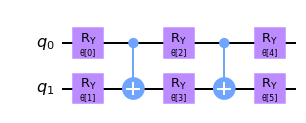

In [7]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 2)
var_form.draw(output="mpl")

And we train again the VQC

In [8]:
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

{'num_optimizer_evals': 176, 'min_val': 0.4502872009675499, 'opt_params': array([ 3.26727256,  0.14049608,  1.30859571, -2.73566985,  0.06107373,
       -0.90832564]), 'eval_time': 317.23886370658875, 'eval_count': 176, 'training_loss': 0.4502872009675499, 'testing_accuracy': 0.9, 'test_success_ratio': 0.9, 'testing_loss': 0.40782137128069007}
